In [1]:
import sys
sys.path.append('../')

from tqdm.notebook import tqdm

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from basic_utils.data import slice_sequances

%matplotlib inline

sns.set_style()

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

## Load data

In [2]:
movies_df = pd.read_csv('/ssd_data/cinema_hack/movies_database.csv')
movies_ts = pd.read_csv('/ssd_data/cinema_hack/movies_dataset_10 months.csv')
sample_sub = pd.read_csv('/ssd_data/cinema_hack/submission.csv')

sample_sub['movie_id'] = sample_sub[' movie_id']
sample_sub = sample_sub.drop(columns=' movie_id')
movies_ts['ts'] = pd.to_datetime(movies_ts['ts'])
movies_ts = movies_ts.sort_values('ts').reset_index(drop=True)

## Observe movies_ts

In [3]:
movies_ts.head()

ts               user_id  movie_id  episode_id
0 2019-10-01 00:01:31   6582736606368231689     15391       81786
1 2019-10-01 00:01:38    750594023898082561     17539      104006
2 2019-10-01 00:01:57   2110694416164715906     11324           0
3 2019-10-01 00:02:41  16763157513451692176     15498           0
4 2019-10-01 00:03:17  15301363348200942035     11195           0

In [4]:
print(f"Train test user intersection : {len(set(sample_sub['user_id']) & set(movies_ts['user_id']))}")
print(f"Test user len : {sample_sub['user_id'].shape[0]}")
print(f"Train user len : {len(set(movies_ts['user_id']))}")

Train test user intersection : 1695
Test user len : 1695
Train user len : 2055


In [5]:
unique_movies = movies_ts['movie_id'].nunique()
print(f'Amount of unique films: {unique_movies}')

Amount of unique films: 4843


In [6]:
min_film_index = movies_ts['movie_id'].min()
print(f"Min Film indes: {min_film_index}")
max_film_index = movies_ts['movie_id'].max()
print(f"Max Film indes: {max_film_index}")

Min Film indes: 0
Max Film indes: 20326


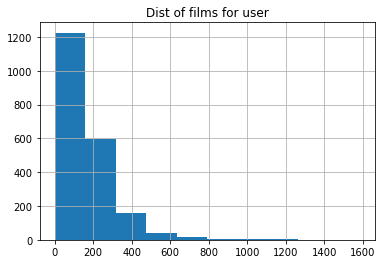

In [7]:
plt.title('Dist of films for user')
movies_ts['user_id'].value_counts().hist();
plt.show()

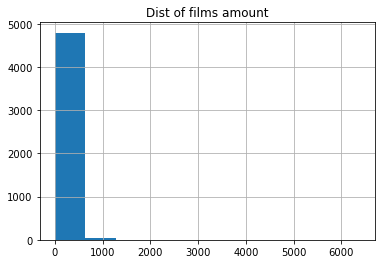

In [8]:
plt.title('Dist of films amount')
movies_ts['movie_id'].value_counts().hist();
plt.show()

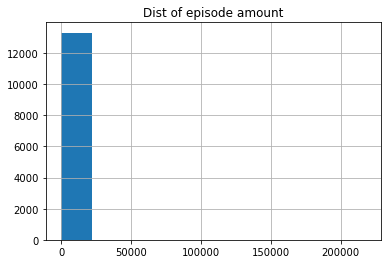

In [9]:
plt.title('Dist of episode amount')
movies_ts['episode_id'].value_counts().hist();
plt.show()

In [10]:
sample_sub['movie_id'] = ' '.join([str(el) for el in movies_ts['movie_id'].value_counts().index.tolist()[:5]])
sample_sub.to_csv('../subs/top_5_sub.csv', index=False)

In [11]:
grouped_by_users = movies_ts.groupby('user_id')['movie_id'].apply(list).reset_index()
grouped_by_users['len'] = grouped_by_users['movie_id'].apply(len)

seq len median: 134.0
seq len mean: 168.5683698296837
seq len min: 2
seq len max: 1581


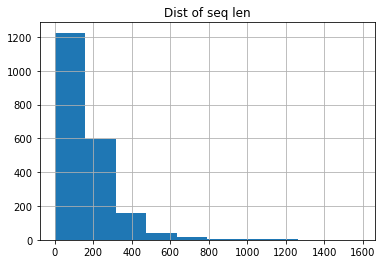

In [12]:
seq_len_median = grouped_by_users['len'].median()
print(f'seq len median: {seq_len_median}')
seq_len_mean = grouped_by_users['len'].mean()
print(f'seq len mean: {seq_len_mean}')
seq_len_min = grouped_by_users['len'].min()
print(f'seq len min: {seq_len_min}')
seq_len_max = grouped_by_users['len'].max()
print(f'seq len max: {seq_len_max}')

plt.title('Dist of seq len')
grouped_by_users['len'].hist()
plt.show()

test seq len median: 149.0
test seq len mean: 184.18171091445427
test seq len min: 4
test seq len max: 1581


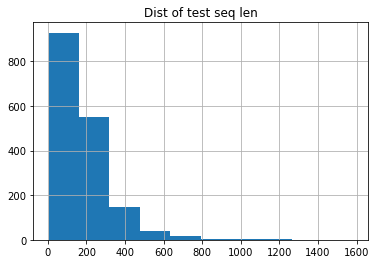

In [13]:
test_grouped_by_users = grouped_by_users[grouped_by_users['user_id'].isin(set(sample_sub['user_id']))]

test_seq_len_median = test_grouped_by_users['len'].median()
print(f'test seq len median: {test_seq_len_median}')
test_seq_len_mean = test_grouped_by_users['len'].mean()
print(f'test seq len mean: {test_seq_len_mean}')
test_seq_len_min = test_grouped_by_users['len'].min()
print(f'test seq len min: {test_seq_len_min}')
test_seq_len_max = test_grouped_by_users['len'].max()
print(f'test seq len max: {test_seq_len_max}')

plt.title('Dist of test seq len')
test_grouped_by_users['len'].hist()
plt.show()

In [14]:
ready_to_use_seqs = slice_sequances(
    movies_ts,
    y_size=2
)

100%|██████████| 2051/2051 [00:00<00:00, 12895.03it/s]


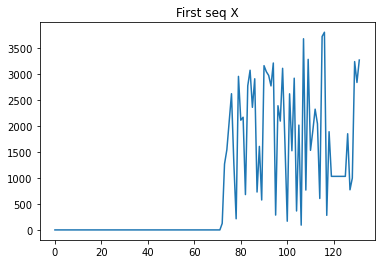

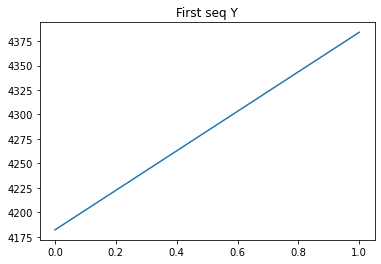

In [15]:
plt.title('First seq X')
plt.plot(ready_to_use_seqs[0][0])
plt.show()

plt.title('First seq Y')
plt.plot(ready_to_use_seqs[1][0])
plt.show()

## Observe movies_df

In [16]:
print(f' Movies in TS df: {len( set(movies_ts.movie_id))}')
print(f' Movies in Info df: {len( set(movies_df.id))}')
print(f'Intersection : {len(set(movies_df.id) & set(movies_ts.movie_id))}')

 Movies in TS df: 4843
 Movies in Info df: 16594
Intersection : 4326


In [17]:
movies_ts[movies_ts.movie_id.isin(set(movies_ts.movie_id)-set(movies_df.id))]

ts               user_id  movie_id  episode_id
121    2019-10-01 09:07:29  10815805785924310423      7275           0
150    2019-10-01 09:45:19  16860855377270730444      6129           0
297    2019-10-01 13:14:25   3044784393180304830         0       97493
303    2019-10-01 13:21:12  11103234376569611007     18230           0
406    2019-10-01 15:15:57  15180558798739924696     18212      110492
...                    ...                   ...       ...         ...
346041 2020-07-31 20:11:45  17150040516611164656     17234      124143
346053 2020-07-31 20:23:06  17150040516611164656     17234      125309
346068 2020-07-31 20:33:10   6963966791235516970     15567           0
346069 2020-07-31 20:34:14  17150040516611164656     17234      125310
346085 2020-07-31 20:44:32  10127904214192322094     17020           0

[18444 rows x 4 columns]

In [18]:
movies_df_selected = movies_df[movies_df.id.isin(movies_ts.movie_id)].reset_index(drop=True)

In [ ]:
movies_df_selected['genres_first'] = movies_df_selected['genres'].apply(lambda x: x.split(',')[0])

unique_genres = set(','.join(movies_df_selected['genres_first'].tolist()).split(','))
unique_genres = {el:(idx + 1) for idx, el in enumerate(unique_genres)}

movies_df_selected['genres_first_category'] = movies_df_selected['genres_first'].map(unique_genres)
print(f"Unique genres : {unique_genres}")

In [ ]:
movies_df_selected['available_now_category'] = movies_df_selected['available_now'].map({
    'no':0,
    'yes':1
})

movies_df_selected['available_now_category']

In [19]:
movies_df_selected['is_serie'] = 0
movies_df_selected.loc[
    movies_df_selected['id'].isin(movies_ts.loc[movies_ts['episode_id'] != 0, 'movie_id']),
    'is_serie'
] = 1

In [20]:
movies_df_selected['is_serie'].value_counts()

0    3712
1     614
Name: is_serie, dtype: int64

In [21]:
denis_data = pd.read_csv('../add_data/movies_database_extend.csv', sep=',', header=0, lineterminator='\n')

In [22]:
denis_cols = ['averageRating', 'final_rating', 'numVotes', 'tmdb_rating', 'imdb_rating', 'id']
denis_data[denis_cols]

averageRating  final_rating  numVotes  tmdb_rating  imdb_rating     id
0                5.8           5.8    1998.0          4.8          5.8      1
1                6.1           6.1    1345.0          5.4          6.1      2
2                6.3           6.3   60346.0          5.9          6.3      3
3                6.4           6.4   67510.0          6.1          6.4      4
4                7.6           7.6   63313.0          7.4          7.6      5
...              ...           ...       ...          ...          ...    ...
16589            NaN           NaN       NaN          5.0          NaN  20716
16590            7.4           7.4  543662.0          7.7          7.4  20717
16591            5.1           5.1    1066.0          6.3          5.1  20719
16592            6.6           6.6     878.0          8.1          6.6  20720
16593            6.8           6.8    1629.0          6.7          NaN  20723

[16594 rows x 6 columns]

In [23]:
movies_df_selected = movies_df_selected.drop(columns=['imdb_rating','tmdb_rating']).merge(denis_data[denis_cols], on='id', how='left')

In [24]:
for col in ['averageRating', 'final_rating', 'numVotes', 'tmdb_rating', 'imdb_rating']:
    movies_df_selected[col+'_isna'] = movies_df_selected[col].isna().astype(float)
    movies_df_selected[col] = movies_df_selected[col].fillna(1.0)

In [25]:
embed_cols = ['averageRating', 'final_rating', 'numVotes', 'tmdb_rating', 'imdb_rating']
embed_cols += [el + '_isna' for el in embed_cols]
embed_cols += ['is_serie']

In [26]:
movies_df_selected = movies_df_selected.set_index('id')[embed_cols]
movies_df_selected

averageRating  final_rating  numVotes  tmdb_rating  imdb_rating  \
id                                                                       
1                5.8           5.8    1998.0          4.8          5.8   
2                6.1           6.1    1345.0          5.4          6.1   
3                6.3           6.3   60346.0          5.9          6.3   
4                6.4           6.4   67510.0          6.1          6.4   
5                7.6           7.6   63313.0          7.4          7.6   
...              ...           ...       ...          ...          ...   
20245            6.1           6.1   24150.0          5.9          6.1   
20249            6.9           6.9  282888.0          6.6          6.9   
20324            6.5           6.5     948.0          6.4          6.5   
20325            6.6           6.6    1370.0          7.1          6.6   
20326            7.5           7.5   30514.0          7.6          7.5   

       averageRating_isna  final_rating_isna  numVotes_isna  tmdb_rating_isna  \
id                                                                              
1                     0.0                0.0            0.0               0.0   
2                     0.0                0.0            0.0               0.0   
3                     0.0                0.0            0.0               0.0   
4                     0.0                0.0            0.0               0.0   
5                     0.0                0.0            0.0               0.0   
...                   ...                ...            ...               ...   
20245                 0.0                0.0            0.0               0.0   
20249                 0.0                0.0            0.0               0.0   
20324                 0.0                0.0            0.0               0.0   
20325                 0.0                0.0            0.0               0.0   
20326                 0.0                0.0            0.0               0.0   

       imdb_rating_isna  is_serie  
id                                 
1                   0.0         0  
2                   0.0         0  
3                   0.0         0  
4                   0.0         0  
5                   0.0         0  
...                 ...       ...  
20245               0.0         0  
20249               0.0         0  
20324               0.0         0  
20325               0.0         0  
20326               0.0         0  

[4326 rows x 11 columns]

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
movies_df_selected[embed_cols] = StandardScaler().fit_transform(movies_df_selected.values)
movies_df_selected

averageRating  final_rating  numVotes  tmdb_rating  imdb_rating  \
id                                                                       
1          -0.190738     -0.326200 -0.432721    -0.478982    -0.263255   
2          -0.018080     -0.126057 -0.436100    -0.176180    -0.075874   
3           0.097025      0.007372 -0.130758     0.076155     0.049047   
4           0.154578      0.074086 -0.093682     0.177089     0.111507   
5           0.845210      0.874658 -0.115403     0.833161     0.861031   
...              ...           ...       ...          ...          ...   
20245      -0.018080     -0.126057 -0.318080     0.076155    -0.075874   
20249       0.442342      0.407658  1.020945     0.429425     0.423809   
20324       0.212131      0.140800 -0.438155     0.328490     0.173968   
20325       0.269683      0.207515 -0.435971     0.681760     0.236428   
20326       0.787658      0.807944 -0.285145     0.934095     0.798571   

       averageRating_isna  final_rating_isna  numVotes_isna  tmdb_rating_isna  \
id                                                                              
1               -0.266566          -0.195338      -0.266566         -0.269538   
2               -0.266566          -0.195338      -0.266566         -0.269538   
3               -0.266566          -0.195338      -0.266566         -0.269538   
4               -0.266566          -0.195338      -0.266566         -0.269538   
5               -0.266566          -0.195338      -0.266566         -0.269538   
...                   ...                ...            ...               ...   
20245           -0.266566          -0.195338      -0.266566         -0.269538   
20249           -0.266566          -0.195338      -0.266566         -0.269538   
20324           -0.266566          -0.195338      -0.266566         -0.269538   
20325           -0.266566          -0.195338      -0.266566         -0.269538   
20326           -0.266566          -0.195338      -0.266566         -0.269538   

       imdb_rating_isna  is_serie  
id                                 
1             -0.225877 -0.406706  
2             -0.225877 -0.406706  
3             -0.225877 -0.406706  
4             -0.225877 -0.406706  
5             -0.225877 -0.406706  
...                 ...       ...  
20245         -0.225877 -0.406706  
20249         -0.225877 -0.406706  
20324         -0.225877 -0.406706  
20325         -0.225877 -0.406706  
20326         -0.225877 -0.406706  

[4326 rows x 11 columns]

In [33]:
movies_df_selected_dict = {k:list(v) for k,v in zip(movies_df_selected.index,movies_df_selected.values) }
movies_df_selected_dict

{1: [-0.19073809521353163,
  -0.32620015756454995,
  -0.4327210073727649,
  -0.47898156406786213,
  -0.2632545162817197,
  -0.2665655498641002,
  -0.19533803378810913,
  -0.2665655498641002,
  -0.2695378123448727,
  -0.22587697572631282,
  -0.4067056463323575],
 2: [-0.018080007769770128,
  -0.12605711459590738,
  -0.43610042293714435,
  -0.17617954066327723,
  -0.0758735525179861,
  -0.2665655498641002,
  -0.19533803378810913,
  -0.2665655498641002,
  -0.2695378123448727,
  -0.22587697572631282,
  -0.4067056463323575],
 3: [0.09702538385940437,
  0.007371580716521194,
  -0.13075754741807755,
  0.07615547884054329,
  0.04904708999116982,
  -0.2665655498641002,
  -0.19533803378810913,
  -0.2665655498641002,
  -0.2695378123448727,
  -0.22587697572631282,
  -0.4067056463323575],
 4: [0.1545780796739919,
  0.07408592837273578,
  -0.0936823052998322,
  0.17708948664207114,
  0.11150741124574806,
  -0.2665655498641002,
  -0.19533803378810913,
  -0.2665655498641002,
  -0.2695378123448727,
  -

In [34]:
import json
with open('../add_data/ratingembed.json', 'w') as f:
    json.dump(movies_df_selected_dict, f)